In [306]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from keras.layers import LSTM
import seaborn as sns
import math
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential

In [307]:
#import data to dataframe
df=pd.read_csv('googlestock.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2004-08-19    50.050049    52.082081    48.028027    50.220219    50.220219   
2004-08-20    50.555557    54.594597    50.300301    54.209209    54.209209   
2004-08-23    55.430431    56.796799    54.579578    54.754753    54.754753   
2004-08-24    55.675674    55.855858    51.836838    52.487488    52.487488   
2004-08-25    52.532532    54.054054    51.991993    53.053055    53.053055   
...                 ...          ...          ...          ...          ...   
2022-03-18  2668.489990  2724.879883  2645.169922  2722.510010  2722.510010   
2022-03-21  2723.270020  2741.000000  2681.850098  2722.030029  2722.030029   
2022-03-22  2722.030029  2821.000000  2722.030029  2797.360107  2797.360107   
2022-03-23  2774.050049  2791.770020  2756.699951  2765.510010  2765.510010   
2022-03-24  2784.000000  2832.379883  2755.010010  2831.439941  2831.439941   

              Volume  
Date                  
2004-08-19  44659096  
2004-08-20  22834343  
2004-08-23  18256126  
2004-08-24  15247337  
2004-08-25   9188602  
...              ...  
2022-03-18   2223100  
2022-03-21   1341600  
2022-03-22   1774800  
2022-03-23   1257700  
2022-03-24   1317900  

[4431 rows x 6 columns]

In [308]:
#checking data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4431 entries, 2004-08-19 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4431 non-null   float64
 1   High       4431 non-null   float64
 2   Low        4431 non-null   float64
 3   Close      4431 non-null   float64
 4   Adj Close  4431 non-null   float64
 5   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 242.3 KB


there are 4431 rows so we're seeing that there aren't any null values. Also the date range for the data is shown here from August 19th 2004 to March 24th 2022. 

In [309]:
#checking duplicates. 
df.duplicated().sum()

0

Even though numbers can easily be duplicated. Since the numbers in the graph go down to the sixth decimal, then it is unlikely that any numbers that are duplicated are real. 

In [310]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  4431.000000  4431.000000  4431.000000  4431.000000  4431.000000   
mean    693.087345   699.735595   686.078751   693.097367   693.097367   
std     645.118799   651.331215   638.579488   645.187806   645.187806   
min      49.644646    50.920921    48.028027    50.055054    50.055054   
25%     248.558563   250.853355   245.813309   248.415916   248.415916   
50%     434.924927   437.887878   432.687683   435.330322   435.330322   
75%    1007.364990  1020.649994   997.274994  1007.790008  1007.790008   
max    3025.000000  3030.929932  2977.979980  2996.770020  2996.770020   

             Volume  
count  4.431000e+03  
mean   6.444992e+06  
std    7.690351e+06  
min    4.656000e+05  
25%    1.695600e+06  
50%    3.778418e+06  
75%    8.002390e+06  
max    8.215117e+07

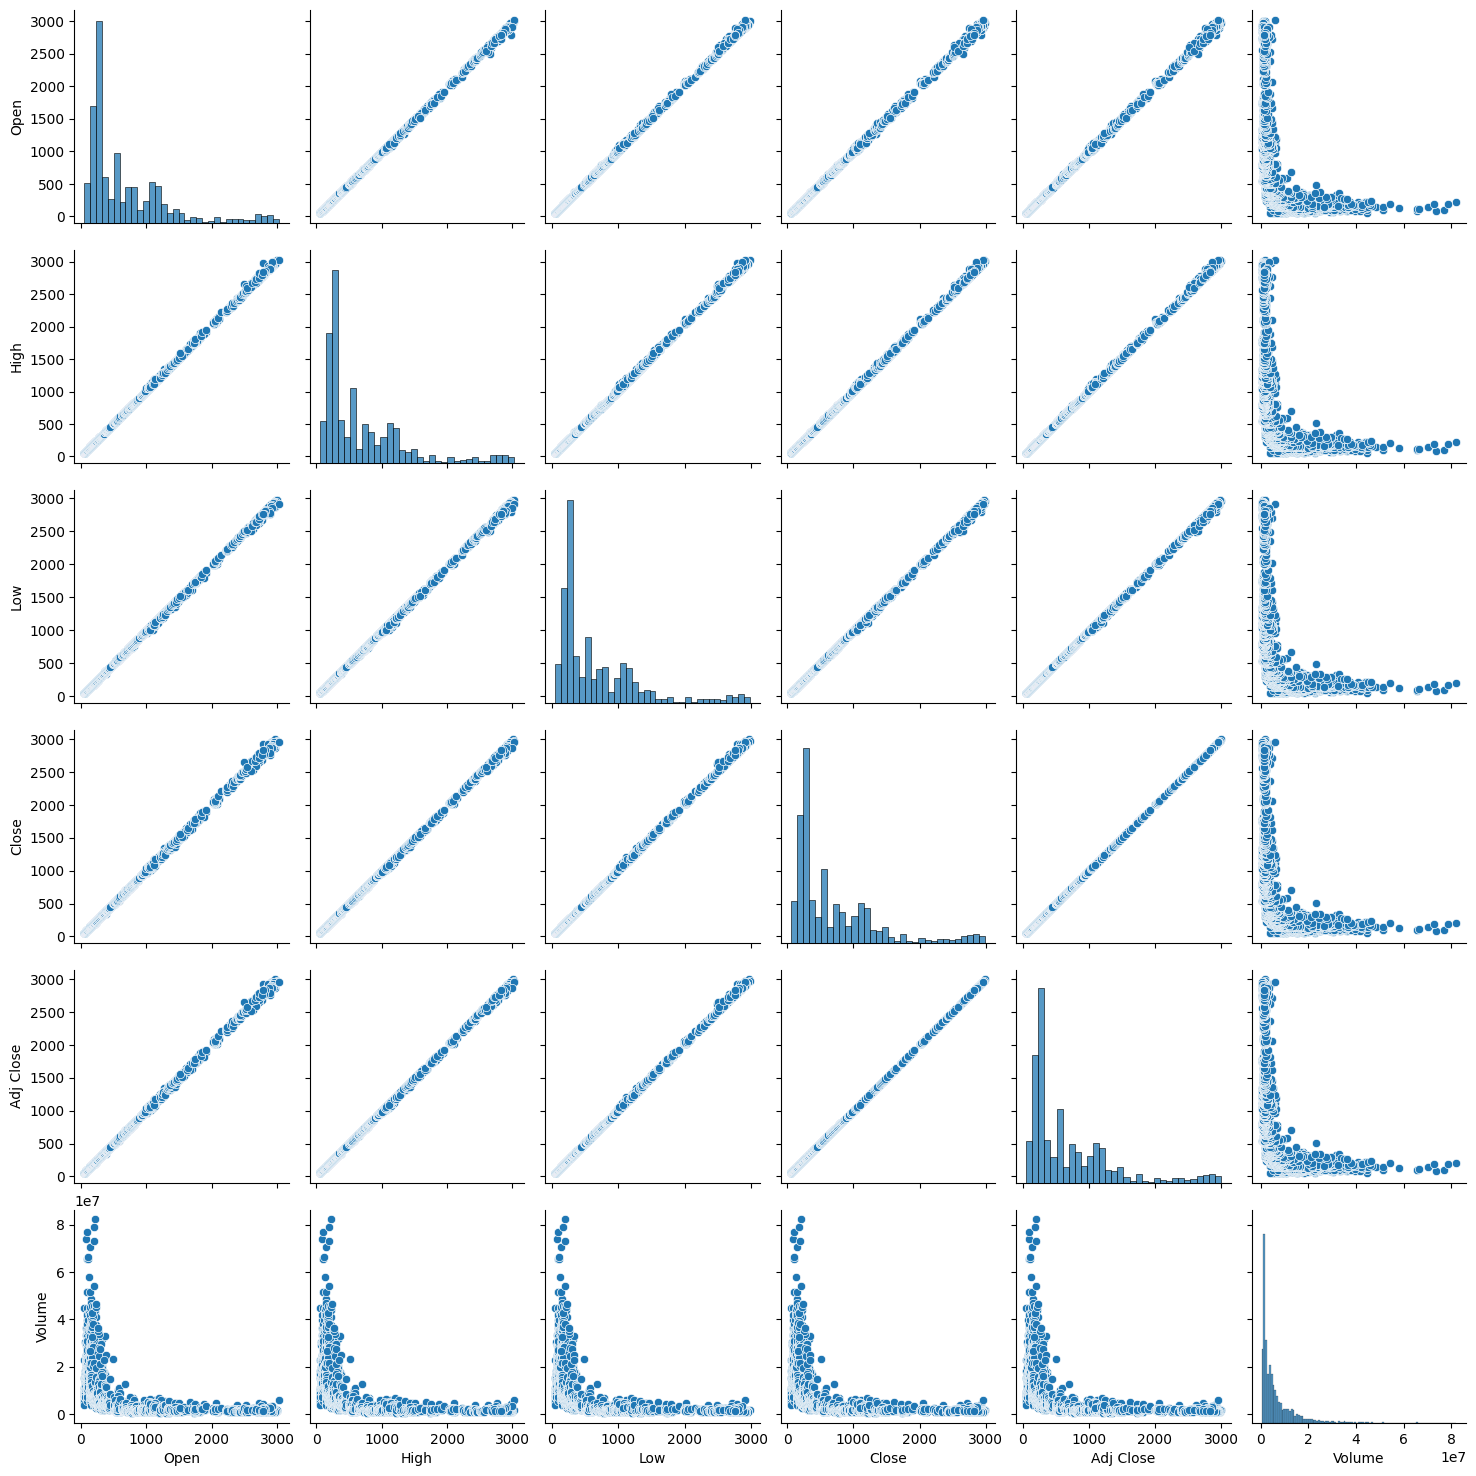

In [311]:
#pairplot of all numeric variables
sns.pairplot(df)
plt.show()

The above graph all looks very similar to each other. This might be because the numbers are all so close together that it's hard to see the minor changes in data. 

<AxesSubplot: >

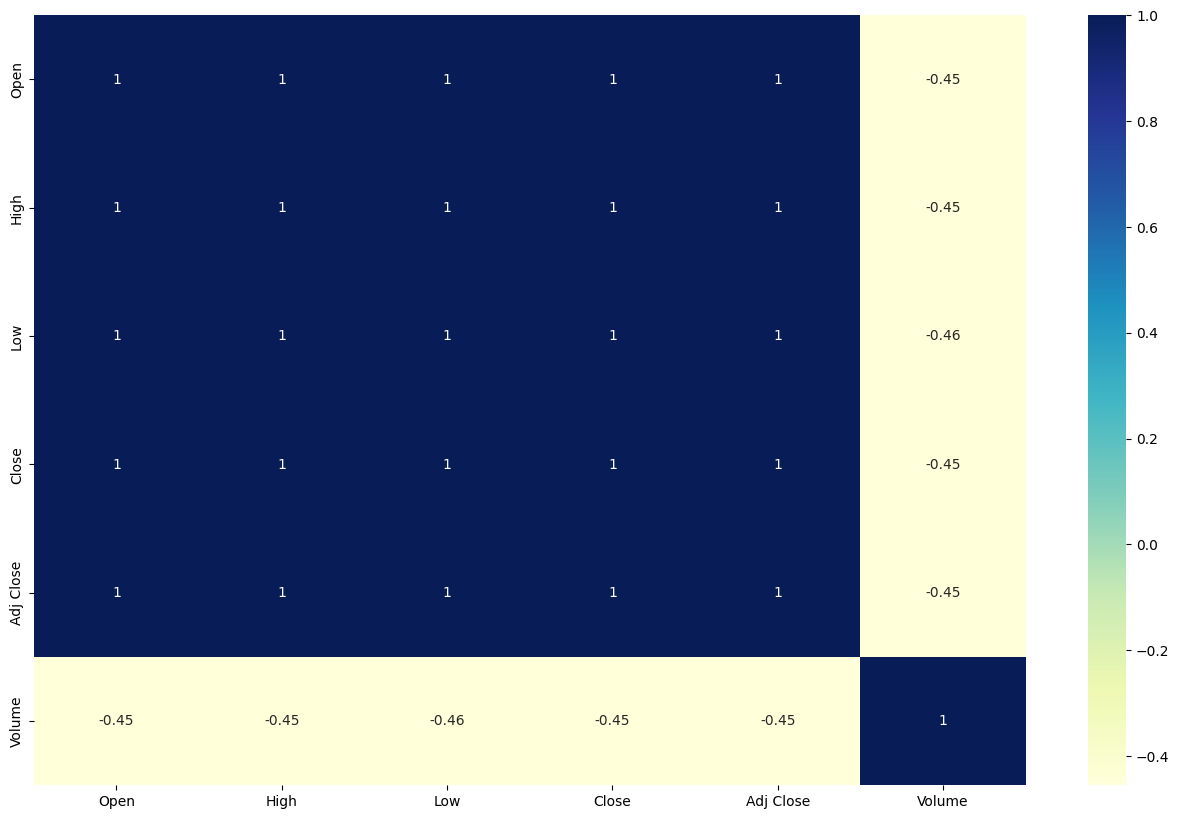

In [312]:
#heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [313]:
#correlation map
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

In [314]:
df['close_minus_open'] = df.apply(lambda row: row.Close - row.Open, axis=1)
df.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096   
2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343   
2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126   
2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337   
2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602   

            close_minus_open  
Date                          
2004-08-19          0.170170  
2004-08-20          3.653652  
2004-08-23         -0.675678  
2004-08-24         -3.188186  
2004-08-25          0.520523

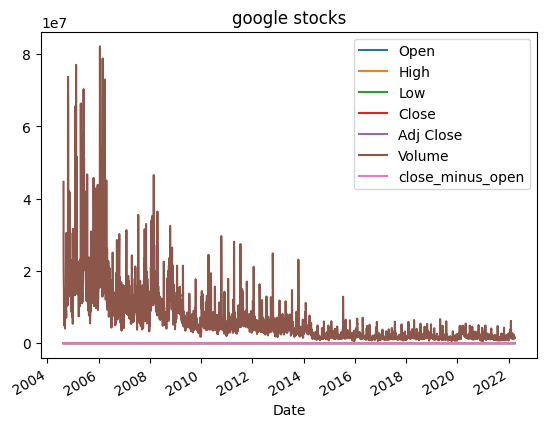

In [315]:
df.plot()
plt.title("google stocks")
plt.show()

This graph is indicating that google stocks are being traded less at a volume that it used to be. However, this doesn't account for stock slices or split stocks. Also, what this could mean is that the majority of shares were sold in the beginning (i.e. investors in the company)  and will hold onto those shares for decades without selling them. This means that they're not being sold and will remain in the same person's possesion during this entire period. 

In [316]:
#copying dataframe
df2 = df.copy()

In [317]:
#making the dates into a proper column so that I can graph it. 
df2.reset_index(inplace=True)
df2

Date         Open         High          Low        Close  \
0    2004-08-19    50.050049    52.082081    48.028027    50.220219   
1    2004-08-20    50.555557    54.594597    50.300301    54.209209   
2    2004-08-23    55.430431    56.796799    54.579578    54.754753   
3    2004-08-24    55.675674    55.855858    51.836838    52.487488   
4    2004-08-25    52.532532    54.054054    51.991993    53.053055   
...         ...          ...          ...          ...          ...   
4426 2022-03-18  2668.489990  2724.879883  2645.169922  2722.510010   
4427 2022-03-21  2723.270020  2741.000000  2681.850098  2722.030029   
4428 2022-03-22  2722.030029  2821.000000  2722.030029  2797.360107   
4429 2022-03-23  2774.050049  2791.770020  2756.699951  2765.510010   
4430 2022-03-24  2784.000000  2832.379883  2755.010010  2831.439941   

        Adj Close    Volume  close_minus_open  
0       50.220219  44659096          0.170170  
1       54.209209  22834343          3.653652  
2       54.754753  18256126         -0.675678  
3       52.487488  15247337         -3.188186  
4       53.053055   9188602          0.520523  
...           ...       ...               ...  
4426  2722.510010   2223100         54.020020  
4427  2722.030029   1341600         -1.239991  
4428  2797.360107   1774800         75.330078  
4429  2765.510010   1257700         -8.540039  
4430  2831.439941   1317900         47.439941  

[4431 rows x 8 columns]

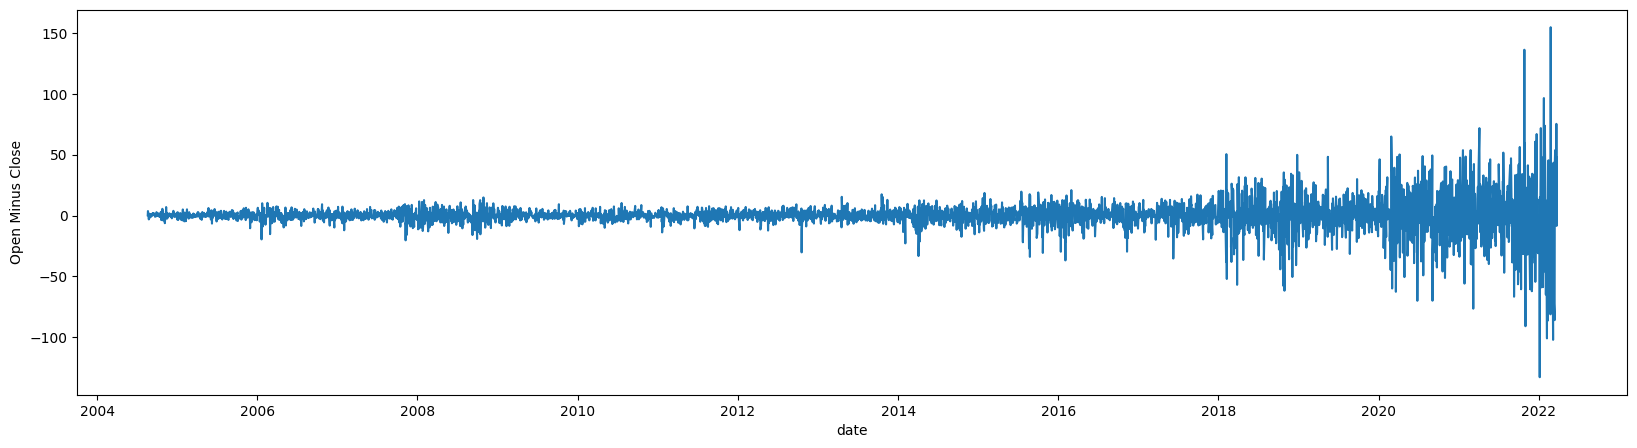

In [318]:
#line graph
plt.figure(figsize=(20,5))
plt.plot(df2['Date'], df2['close_minus_open'])
plt.ylabel('Open Minus Close')
plt.xlabel('date')
plt.show()

This is a very interesting graph showing how the changes between the open and close dates increase through time. This makes sense as stocks become more and more expensive, and the dollar decreases in value, that there is a greater increase in the stock prices by day. 

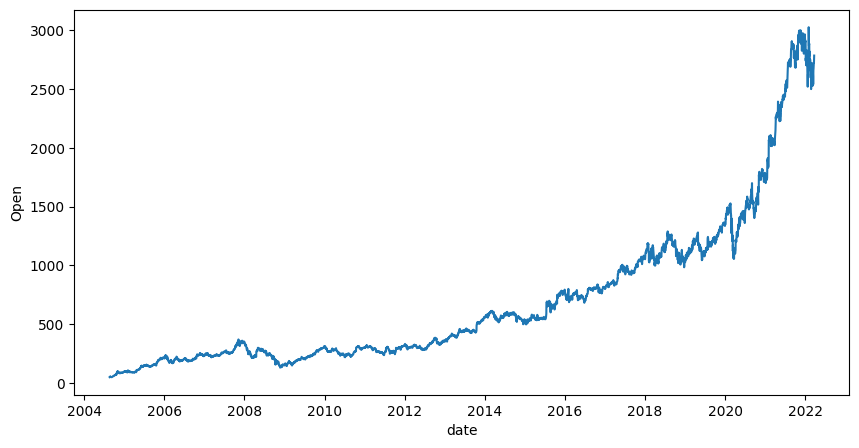

In [319]:
#line graph
plt.figure(figsize=(10,5))
plt.plot(df2['Date'], df2['Open'])
plt.ylabel('Open')
plt.xlabel('date')
plt.show()

The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. Exponential moving averages (EMAs) respond more quickly to recent price changes and can help with the accuracy of the models. 

In [320]:
#creating moving average windows
df['moving_avg30'] = df['Adj Close'].rolling(window = 30).mean()
df['moving_avg100'] = df['Adj Close'].rolling(window = 100).mean()

In [321]:
# function for the RSI indicator for a 14 day moving average window (default)
def get_RSI(df, column = 'Adj Close', time_window = 14):

    diff = df[column].diff(1)

    # up and down logic 
    up_chg = 0 * diff
    down_chg = 0 * diff

    # if close price is higher than previous close, 
    up_chg[diff >0] = diff[diff > 0]

    # if close price is lower than previous close
    down_chg[diff < 0] = diff[diff <0]

    # 
    up_chg_avg = up_chg.ewm(com=time_window -1,min_periods = time_window).mean()
    down_chg_avg = down_chg.ewm(com = time_window -1, min_periods = time_window).mean()
    
    #dividing average gain by average lose to get the RS
    rs = abs(up_chg_avg/down_chg_avg)
    df['rsi'] = 100 - 100 / (1 + rs)

    return df

In [322]:
#verifying our RSI numbers
get_RSI(df)

Open         High          Low        Close    Adj Close  \
Date                                                                          
2004-08-19    50.050049    52.082081    48.028027    50.220219    50.220219   
2004-08-20    50.555557    54.594597    50.300301    54.209209    54.209209   
2004-08-23    55.430431    56.796799    54.579578    54.754753    54.754753   
2004-08-24    55.675674    55.855858    51.836838    52.487488    52.487488   
2004-08-25    52.532532    54.054054    51.991993    53.053055    53.053055   
...                 ...          ...          ...          ...          ...   
2022-03-18  2668.489990  2724.879883  2645.169922  2722.510010  2722.510010   
2022-03-21  2723.270020  2741.000000  2681.850098  2722.030029  2722.030029   
2022-03-22  2722.030029  2821.000000  2722.030029  2797.360107  2797.360107   
2022-03-23  2774.050049  2791.770020  2756.699951  2765.510010  2765.510010   
2022-03-24  2784.000000  2832.379883  2755.010010  2831.439941  2831.439941   

              Volume  close_minus_open  moving_avg30  moving_avg100        rsi  
Date                                                                            
2004-08-19  44659096          0.170170           NaN            NaN        NaN  
2004-08-20  22834343          3.653652           NaN            NaN        NaN  
2004-08-23  18256126         -0.675678           NaN            NaN        NaN  
2004-08-24  15247337         -3.188186           NaN            NaN        NaN  
2004-08-25   9188602          0.520523           NaN            NaN        NaN  
...              ...               ...           ...            ...        ...  
2022-03-18   2223100         54.020020   2673.897998    2802.691404  54.732490  
2022-03-21   1341600         -1.239991   2669.103662    2802.050005  54.691847  
2022-03-22   1774800         75.330078   2669.548332    2800.780105  59.744297  
2022-03-23   1257700         -8.540039   2668.799333    2799.265405  56.857347  
2022-03-24   1317900         47.439941   2668.785994    2797.970605  61.052771  

[4431 rows x 10 columns]

Text(0.5, 1.0, 'Relative Strength Index')

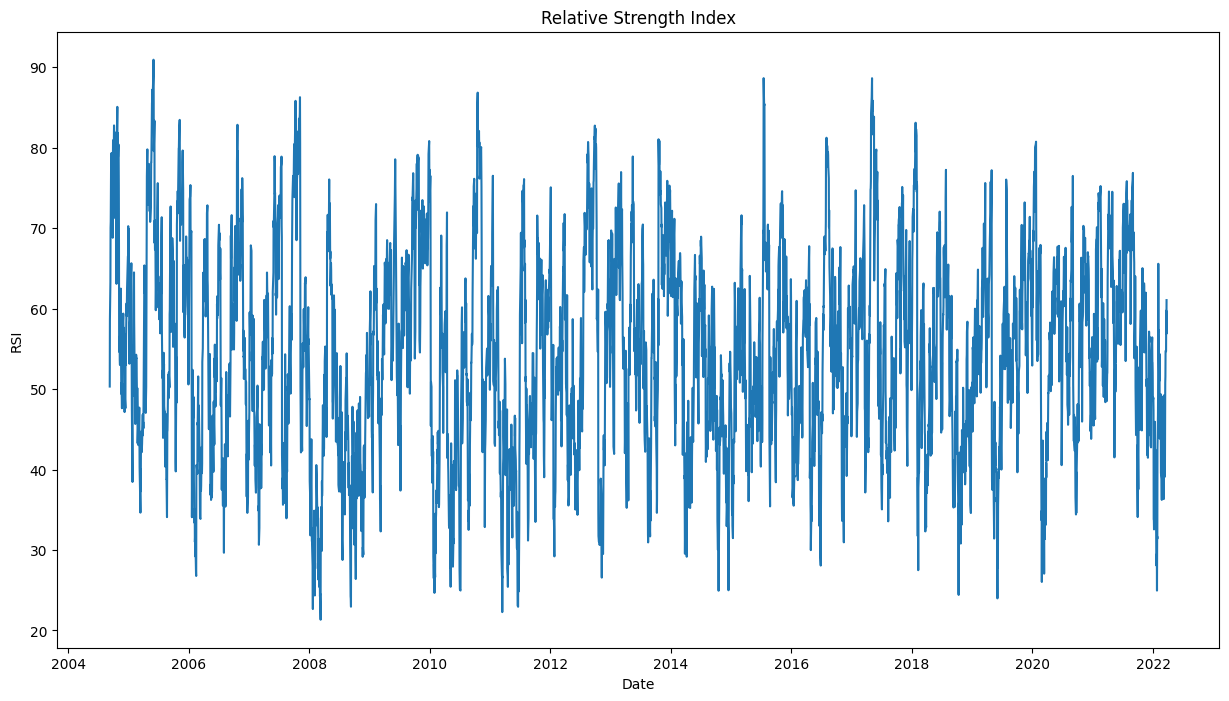

In [323]:
#plotting the RSI
plt.figure(figsize = (15,8))
plt.plot(df['rsi'])
plt.xlabel("Date")
plt.ylabel("RSI")
plt.title('Relative Strength Index')

In [324]:
#making dataframe for train set
train_df = df['High'].iloc[:-4]
x_train = []
y_train = []

In [325]:
for i in range(2, len(train_df)):
    x_train.append(train_df[i-2:i])
    y_train.append(train_df[i])

In [326]:
train_math = math.ceil(len(train_df)*0.8)
train_math

3542

In [327]:
#shaping the train data
x_train, y_train= np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [328]:
#creating dataframe for test data
test_df = train_df[train_math-2:]
x_test=[]
y_test=[] 

In [329]:
for i in range(2, len(test_df)):
    x_test.append(test_df[i-2:i])
    y_test.append(test_df[i])

In [330]:
#reshapping data
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
print(x_test.shape)

(885, 2, 1)


In [331]:
model = Sequential()
# layer of LSTM with with dimension 50
model.add(LSTM(50,activation='relu',input_shape = (x_train.shape[1],1))) 
model.add(Dense(25))
model.add(Dense(1))

In [332]:
#compiling and fitting the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics =['accuracy'])
model.summary()
model.fit(x_train,y_train,epochs =300, batch_size = 100)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 50)                10400     
                                                                 
 dense_16 (Dense)            (None, 25)                1275      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 11701 (45.71 KB)
Trainable params: 11701 (45.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
45/45 [==============================] - 1s 2ms/step - loss: 701650.0625 - accuracy: 0.0000e+00
Epoch 2/300
45/45 [==============================] - 0s 2ms/step - loss: 5364.0078 - accuracy: 0.0000e+00
Epoch 3/300
45/45 [==============================] - 0s 2ms/step - 

45/45 [==============================] - 0s 2ms/step - loss: 348.8367 - accuracy: 0.0000e+00
Epoch 71/300
45/45 [==============================] - 0s 2ms/step - loss: 293.0517 - accuracy: 0.0000e+00
Epoch 72/300
45/45 [==============================] - 0s 2ms/step - loss: 278.8987 - accuracy: 0.0000e+00
Epoch 73/300
45/45 [==============================] - 0s 2ms/step - loss: 276.8715 - accuracy: 0.0000e+00
Epoch 74/300
45/45 [==============================] - 0s 2ms/step - loss: 284.6466 - accuracy: 0.0000e+00
Epoch 75/300
45/45 [==============================] - 0s 2ms/step - loss: 471.9752 - accuracy: 0.0000e+00
Epoch 76/300
45/45 [==============================] - 0s 2ms/step - loss: 276.0189 - accuracy: 0.0000e+00
Epoch 77/300
45/45 [==============================] - 0s 2ms/step - loss: 281.5512 - accuracy: 0.0000e+00
Epoch 78/300
45/45 [==============================] - 0s 2ms/step - loss: 288.2681 - accuracy: 0.0000e+00
Epoch 79/300
45/45 [==============================] - 0s 2m

Epoch 147/300
45/45 [==============================] - 0s 2ms/step - loss: 307.5943 - accuracy: 0.0000e+00
Epoch 148/300
45/45 [==============================] - 0s 2ms/step - loss: 278.9285 - accuracy: 0.0000e+00
Epoch 149/300
45/45 [==============================] - 0s 2ms/step - loss: 277.2529 - accuracy: 0.0000e+00
Epoch 150/300
45/45 [==============================] - 0s 2ms/step - loss: 286.7854 - accuracy: 0.0000e+00
Epoch 151/300
45/45 [==============================] - 0s 2ms/step - loss: 274.7120 - accuracy: 0.0000e+00
Epoch 152/300
45/45 [==============================] - 0s 2ms/step - loss: 373.8367 - accuracy: 0.0000e+00
Epoch 153/300
45/45 [==============================] - 0s 2ms/step - loss: 291.4679 - accuracy: 0.0000e+00
Epoch 154/300
45/45 [==============================] - 0s 2ms/step - loss: 264.0779 - accuracy: 0.0000e+00
Epoch 155/300
45/45 [==============================] - 0s 2ms/step - loss: 268.6078 - accuracy: 0.0000e+00
Epoch 156/300
45/45 [================

45/45 [==============================] - 0s 4ms/step - loss: 260.8138 - accuracy: 0.0000e+00
Epoch 224/300
45/45 [==============================] - 0s 3ms/step - loss: 248.8648 - accuracy: 0.0000e+00
Epoch 225/300
45/45 [==============================] - 0s 4ms/step - loss: 254.7218 - accuracy: 0.0000e+00
Epoch 226/300
45/45 [==============================] - 0s 3ms/step - loss: 256.9905 - accuracy: 0.0000e+00
Epoch 227/300
45/45 [==============================] - 0s 3ms/step - loss: 255.1752 - accuracy: 0.0000e+00
Epoch 228/300
45/45 [==============================] - 0s 4ms/step - loss: 287.9703 - accuracy: 0.0000e+00
Epoch 229/300
45/45 [==============================] - 0s 4ms/step - loss: 282.7791 - accuracy: 0.0000e+00
Epoch 230/300
45/45 [==============================] - 0s 3ms/step - loss: 258.8749 - accuracy: 0.0000e+00
Epoch 231/300
45/45 [==============================] - 0s 4ms/step - loss: 255.7761 - accuracy: 0.0000e+00
Epoch 232/300
45/45 [==============================

45/45 [==============================] - 0s 2ms/step - loss: 258.2151 - accuracy: 0.0000e+00
Epoch 300/300
45/45 [==============================] - 0s 2ms/step - loss: 246.4895 - accuracy: 0.0000e+00


These low RMSE means that the model has good accuracy

In [333]:
# model accuracy for train
train_pred = model.predict(x_train)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, train_pred)))

139/139 [==============================] - 0s 825us/step
Train rmse: 15.247262254140129


In [334]:
#model accuracy for test
test_pred = model.predict(x_test)
print('test rmse:', np.sqrt(mean_squared_error(y_test, test_pred)))

28/28 [==============================] - 0s 852us/step
test rmse: 30.6448459732237


The closer that the r2 is to 100, the more accurate the model is. 

In [335]:
#r2 for train
r2 = r2_score(y_train, train_pred)
print('R2:',r2)


R2: 0.9994471956931901


In [336]:
#r2 for test
r2_2 = r2_score(y_test, test_pred)
print('R2:',r2_2)

R2: 0.9977091113201437


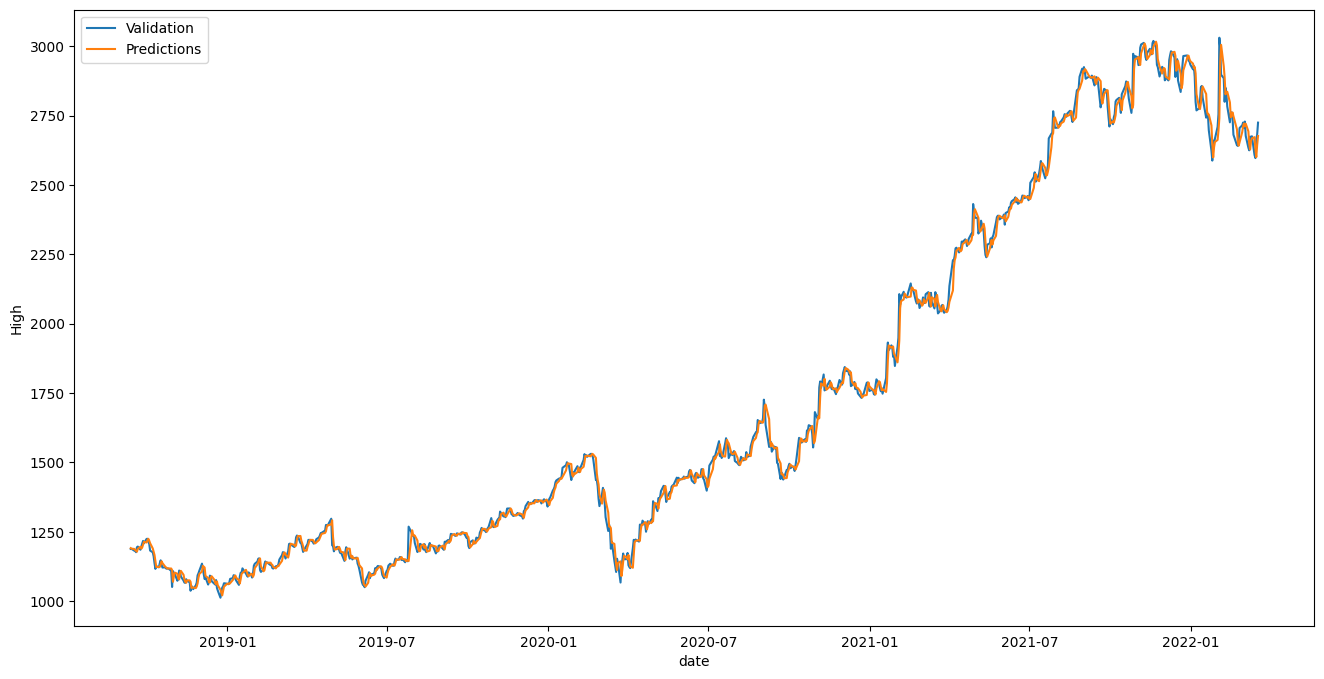

In [339]:
#plotting the validations versus the predictions
valid = pd.DataFrame(train_df[train_math:])
valid['Predictions']=test_pred
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.ylabel('High')
plt.xlabel('date')
plt.show()